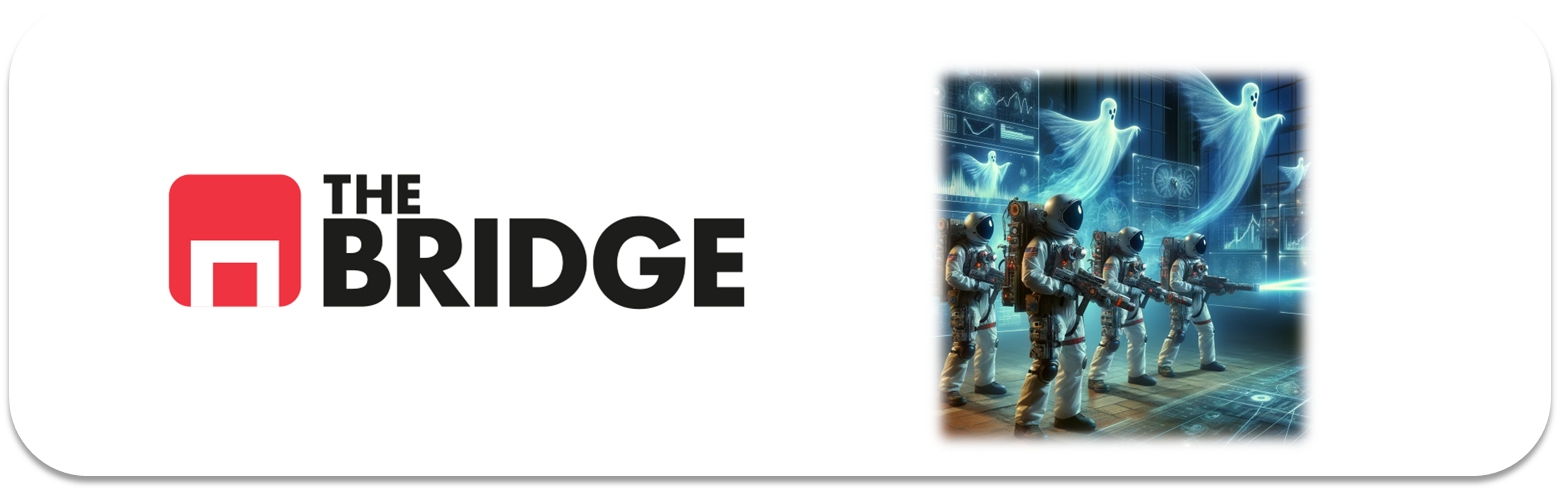

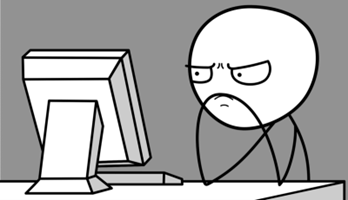

Para ejercitarte y afianzar lo aprendido sobre **Series Temporales**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### El "problema"

Para este ejercicio vamos a predecir cuál será la demanda de pasajeros de una aerolinea, para poder anticiparse a las contrataciones de personal, mantenimiento de las aeronaves y gestión de inventario y comidas.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:
pip install statsmodels


  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --------------------------- ------------ 6.8/9.8 MB 35.0 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 24.5 MB/s eta 0:00:00
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
%pip install conda install statsmodels

Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following yanked versions: 3.0.6, 3.5.0, 3.7.0, 3.17.0, 4.0.0, 4.0.1, 4.0.2, 4.0.3, 4.0.4, 4.0.5, 4.0.7, 4.0.8, 4.0.9, 4.1.2, 4.1.6, 4.2.6, 4.2.7, 4.3.13, 4.3.16
ERROR: Could not find a version that satisfies the requirement conda (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for conda


In [8]:
pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 20.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
%pip install conda install nltk

Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following yanked versions: 3.0.6, 3.5.0, 3.7.0, 3.17.0, 4.0.0, 4.0.1, 4.0.2, 4.0.3, 4.0.4, 4.0.5, 4.0.7, 4.0.8, 4.0.9, 4.1.2, 4.1.6, 4.2.6, 4.2.7, 4.3.13, 4.3.16
ERROR: Could not find a version that satisfies the requirement conda (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for conda


In [10]:
# Para análisis de datos
import pandas as pd
import numpy as np

# Para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Para análisis de series temporales
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Para procesamiento de lenguaje natural (NLP)
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Para manejo de advertencias
import warnings
warnings.filterwarnings('ignore')

# Para configuraciones de visualización
%matplotlib inline

### Ejercicio 1

Carga los datos y adecúa el dataset teniendo en cuenta que es una serie temporal. Para ello convierte la columna de fecha al formato adecuado y luego úsala como índice.

In [25]:


# Cargar el dataset de pasajeros de aire
file_path = r'C:\Users\hp\Desktop\Python Scripts\AirPassengers.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
print(data.head())

# Mostrar los nombres de las columnas
print(data.columns)

# Convertir la columna de fecha al formato adecuado
# Asegúrate de usar el nombre correcto de la columna
data['date'] = pd.to_datetime(data['date'])  # Cambia 'date' por el nombre correcto si es diferente

# Usar la columna de fecha como índice
data.set_index('date', inplace=True)  # Cambia 'date' por el nombre correcto si es diferente

# Mostrar la información del dataset
print(data.info())

# Mostrar las primeras filas del dataset con el índice adecuado
print(data.head())

         date  value
0  1949-01-01    112
1  1949-02-01    118
2  1949-03-01    132
3  1949-04-01    129
4  1949-05-01    121
Index(['date', 'value'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None
            value
date             
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121


In [12]:
# Cargar el dataset XML
xml_file_path = r'C:\Users\hp\Desktop\Python Scripts\general-train-tagged.xml'
xml_data = pd.read_xml(xml_file_path)

# Mostrar las primeras filas del dataset
print(xml_data.head())

              tweetid            user  \
0  142389495503925248      ccifuentes   
1  142389933619945473  CarmendelRiego   
2  142391947707940864  CarmendelRiego   
3  142416095012339712    mgilguerrero   
4  142422495721562112        paurubio   

                                             content                 date  \
0        Salgo de #VeoTV , que día más largoooooo...  2011-12-02T00:47:55   
1  @PauladeLasHeras No te libraras de ayudar me/n...  2011-12-02T00:49:40   
2                          @marodriguezb Gracias MAR  2011-12-02T00:57:40   
3  Off pensando en el regalito Sinde, la que se v...  2011-12-02T02:33:37   
4  Conozco a alguien q es adicto al drama! Ja ja ...  2011-12-02T02:59:03   

  lang sentiments topics  
0   es      \n     \n     
1   es      \n     \n     
2   es      \n     \n     
3   es      \n     \n     
4   es      \n     \n     


### Ejercicio 2

¿De qué fecha a qué fecha va el histórico?¿Qué periodicidad tiene la serie?

In [14]:
# Suponiendo que ya has cargado el dataset y configurado el índice como se mostró anteriormente

# Obtener la fecha mínima y máxima
fecha_minima = data.index.min()
fecha_maxima = data.index.max()

# Mostrar el rango de fechas
print(f"Rango de fechas: {fecha_minima} a {fecha_maxima}")

# Determinar la periodicidad
# Calcular la diferencia entre las fechas consecutivas
diferencias = data.index.to_series().diff().dropna()

# Mostrar las diferencias
print("Diferencias entre fechas consecutivas:")
print(diferencias)

# Determinar la periodicidad
periodicidad = diferencias.value_counts().idxmax()  # La diferencia más común
print(f"La periodicidad de la serie es: {periodicidad}")

Rango de fechas: 1949-01-01 00:00:00 a 1960-12-01 00:00:00
Diferencias entre fechas consecutivas:
date
1949-02-01   31 days
1949-03-01   28 days
1949-04-01   31 days
1949-05-01   30 days
1949-06-01   31 days
               ...  
1960-08-01   31 days
1960-09-01   31 days
1960-10-01   30 days
1960-11-01   31 days
1960-12-01   30 days
Name: date, Length: 143, dtype: timedelta64[ns]
La periodicidad de la serie es: 31 days 00:00:00


### Ejercicio 3

¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad? Analiza de manera gráfica, pero todavía sin descomponer la serie.

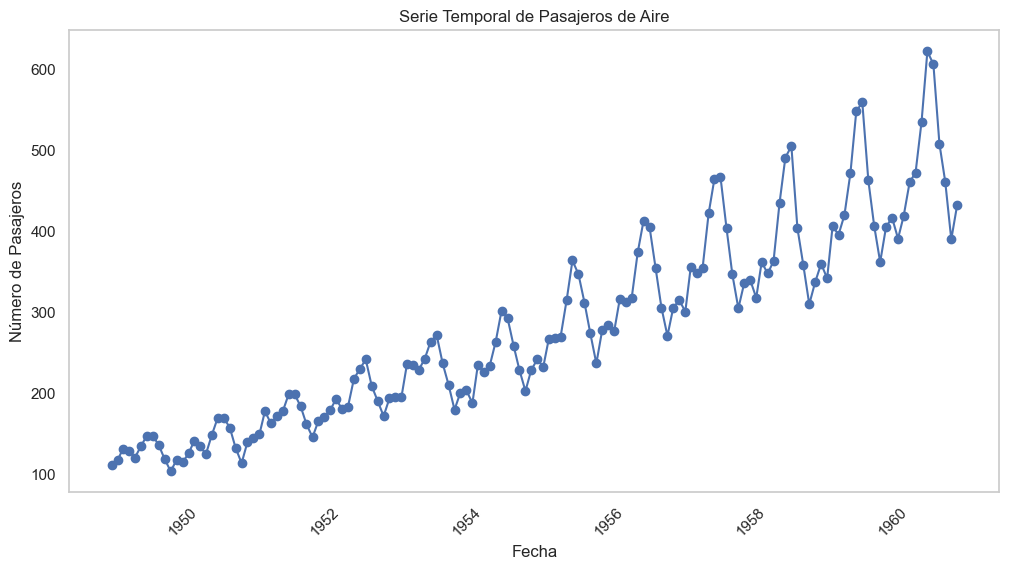

<Figure size 1200x600 with 0 Axes>

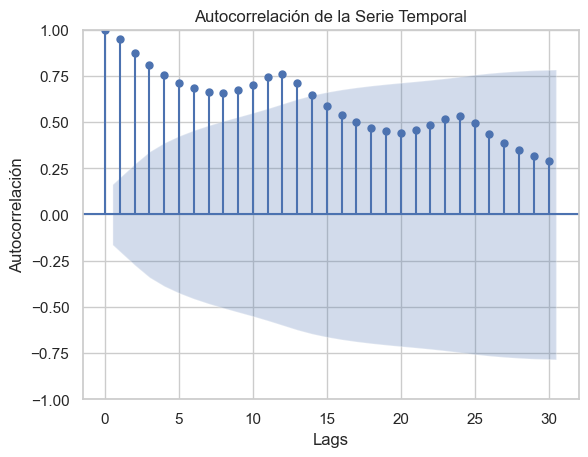

In [26]:


# Configuración de estilo para los gráficos
sns.set(style='whitegrid')

# Graficar la serie temporal
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['value'], marker='o', linestyle='-')
plt.title('Serie Temporal de Pasajeros de Aire')
plt.xlabel('Fecha')
plt.ylabel('Número de Pasajeros')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Graficar la autocorrelación
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 6))
plot_acf(data['value'], lags=30)  # Cambia el número de lags según sea necesario
plt.title('Autocorrelación de la Serie Temporal')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

### Ejercicio 4

¿Podrías demostrar de dos maneras estadísticas que la serie no es estacionaria?

Estadístico ADF: 0.8153688792060482
Valor p: 0.991880243437641
Número de lags utilizados: 13
Número de observaciones: 130
Valores críticos:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598
No se puede rechazar la hipótesis nula. La serie es no estacionaria.


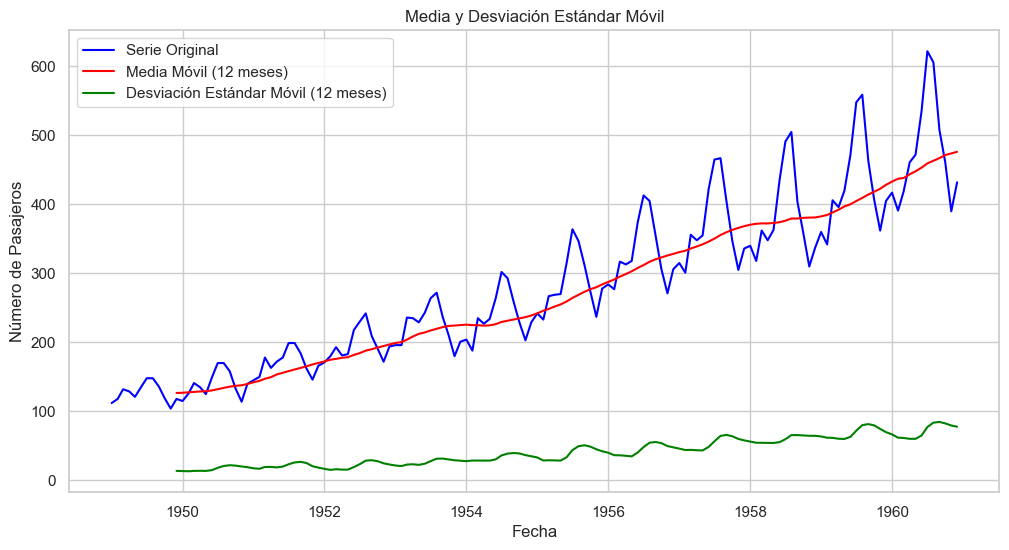

In [27]:


# 1. Prueba de Dickey-Fuller Aumentada
result = adfuller(data['value'])
print('Estadístico ADF:', result[0])
print('Valor p:', result[1])
print('Número de lags utilizados:', result[2])
print('Número de observaciones:', result[3])
print('Valores críticos:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpretación de la prueba ADF
if result[1] > 0.05:
    print("No se puede rechazar la hipótesis nula. La serie es no estacionaria.")
else:
    print("Se rechaza la hipótesis nula. La serie es estacionaria.")

# 2. Gráfico de la media y la varianza
rolling_mean = data['value'].rolling(window=12).mean()  # Media móvil
rolling_std = data['value'].rolling(window=12).std()    # Desviación estándar móvil

plt.figure(figsize=(12, 6))
plt.plot(data['value'], label='Serie Original', color='blue')
plt.plot(rolling_mean, label='Media Móvil (12 meses)', color='red')
plt.plot(rolling_std, label='Desviación Estándar Móvil (12 meses)', color='green')
plt.title('Media y Desviación Estándar Móvil')
plt.xlabel('Fecha')
plt.ylabel('Número de Pasajeros')
plt.legend()
plt.show()

### Ejercicio 5

Emplea la descomposición que hemos aprendido en el workout para representar gráficamente la tendencia. Si has mostrado gráficamente la tendencia en el ejercicio 3, compara ambos.

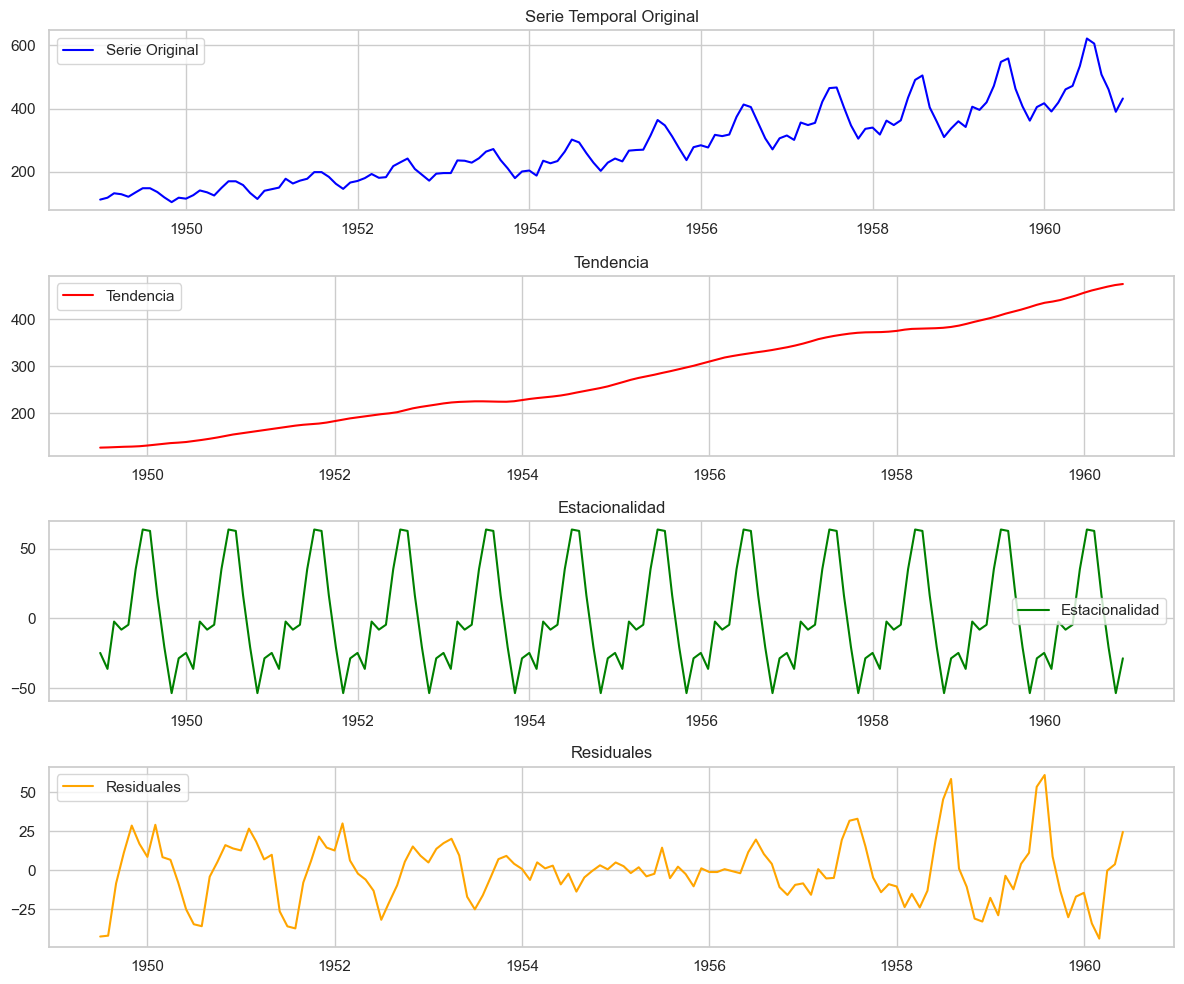

In [28]:


# Descomponer la serie temporal
decomposition = seasonal_decompose(data['value'], model='additive')  # O 'multiplicative' según el caso

# Graficar la descomposición
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(data['value'], label='Serie Original', color='blue')
plt.title('Serie Temporal Original')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia', color='red')
plt.title('Tendencia')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad', color='green')
plt.title('Estacionalidad')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuales', color='orange')
plt.title('Residuales')
plt.legend()

plt.tight_layout()
plt.show()

### Ejercicio 6

Visualiza todos los componentes de la serie temporal por separado

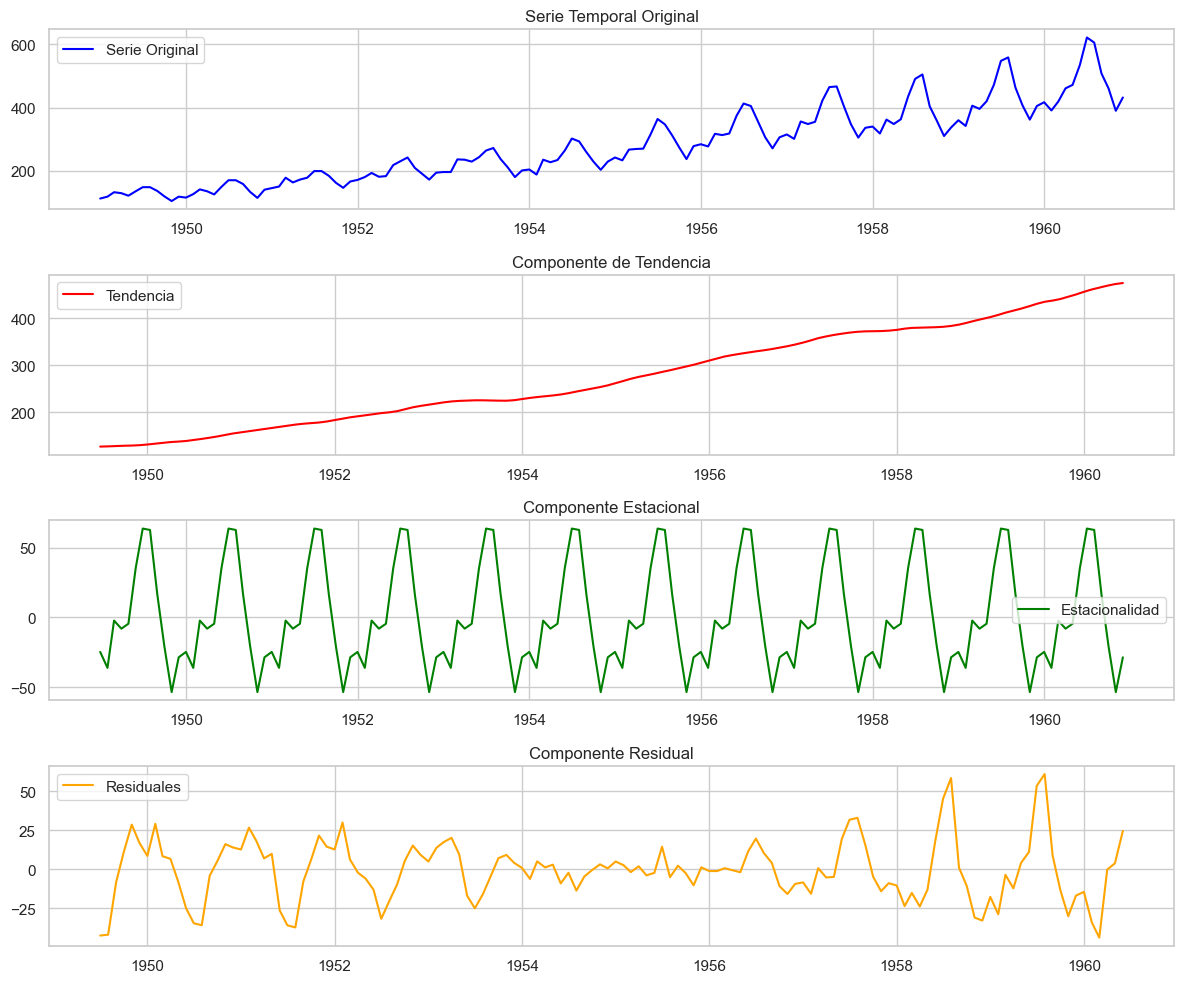

In [29]:


# Descomponer la serie temporal
decomposition = seasonal_decompose(data['value'], model='additive')  # O 'multiplicative' según el caso

# Graficar los componentes
plt.figure(figsize=(12, 10))

# Componente de la serie original
plt.subplot(411)
plt.plot(data['value'], label='Serie Original', color='blue')
plt.title('Serie Temporal Original')
plt.legend()

# Componente de tendencia
plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia', color='red')
plt.title('Componente de Tendencia')
plt.legend()

# Componente estacional
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad', color='green')
plt.title('Componente Estacional')
plt.legend()

# Componente residual
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuales', color='orange')
plt.title('Componente Residual')
plt.legend()

plt.tight_layout()
plt.show()

### Ejercicio 7

Crea una matriz de correlación con los últimos 24 instantes (matriz de autocorrelación). Crea un dataframe con shift de 1 a 24 para ello, la idea es que puedas hacer una matriz de correlación con el valor actual y los 24 valores anteriores. Es decir de un mes con sus 23 meses anteriores. Interpreta la estacionalidad

         Lag_1  Lag_2  Lag_3  Lag_4  Lag_5  Lag_6  Lag_7  Lag_8  Lag_9  \
Lag_1      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lag_2      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lag_3      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lag_4      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lag_5      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lag_6      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lag_7      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lag_8      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lag_9      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lag_10     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lag_11     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lag_12     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lag_13     NaN    NaN    NaN    NaN   

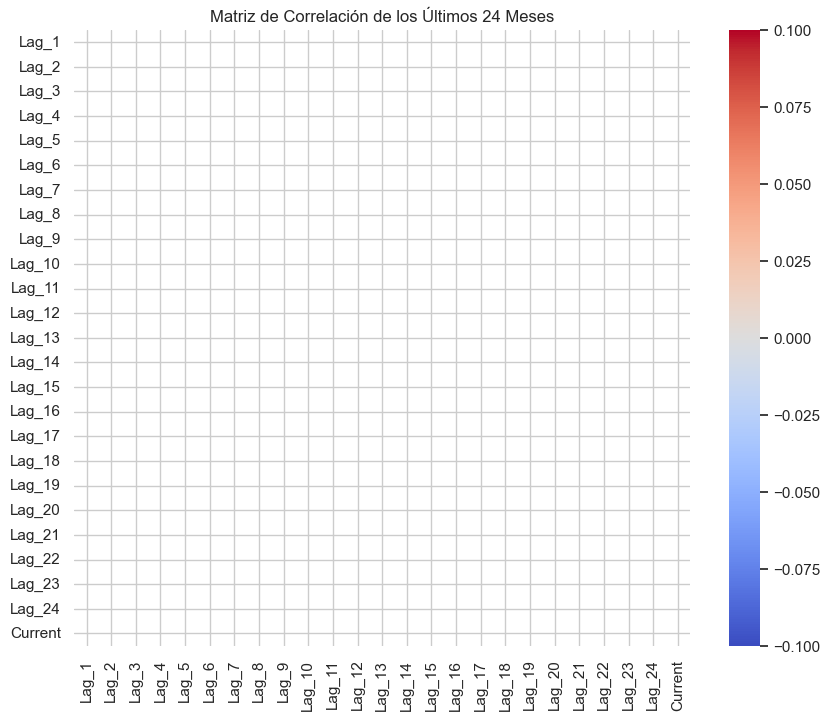

In [30]:


# Crear un DataFrame con los últimos 24 meses
data_24 = data['value'].tail(24)

# Crear un DataFrame con los valores actuales y los 23 meses anteriores
data_shifted = pd.DataFrame({f'Lag_{i}': data_24.shift(i) for i in range(1, 25)})
data_shifted['Current'] = data_24.values

# Eliminar filas con valores NaN (los primeros 24 meses no tendrán datos para todos los lags)
data_shifted.dropna(inplace=True)

# Calcular la matriz de correlación
correlation_matrix = data_shifted.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación de los Últimos 24 Meses')
plt.show()

### Ejercicio 8
Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?

In [20]:
# Mostrar la matriz de correlación
print(correlation_matrix)

# Identificar los lags con alta correlación
high_correlation_lags = correlation_matrix['Current'][abs(correlation_matrix['Current']) > 0.5]
print("Lags con alta correlación:")
print(high_correlation_lags)

         Lag_1  Lag_2  Lag_3  Lag_4  Lag_5  Lag_6  Lag_7  Lag_8  Lag_9  \
Lag_1      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lag_2      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lag_3      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lag_4      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lag_5      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lag_6      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lag_7      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lag_8      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lag_9      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lag_10     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lag_11     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lag_12     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lag_13     NaN    NaN    NaN    NaN   

### Ejercicio 9

 Divide en train y test. En este caso no haremos división en validación, entre otras razones por la cantidad de datos que tenemos. Guarda 20 muestras para test.

In [21]:
# Definir el tamaño del conjunto de prueba
test_size = 20

# Dividir el conjunto de datos
train = data[:-test_size]  # Todos los datos menos los últimos 20
test = data[-test_size:]    # Los últimos 20 datos

# Mostrar la información de los conjuntos
print("Conjunto de entrenamiento:")
print(train.info())
print("\nConjunto de prueba:")
print(test.info())

# Mostrar las primeras filas de cada conjunto
print("\nPrimeras filas del conjunto de entrenamiento:")
print(train.head())
print("\nPrimeras filas del conjunto de prueba:")
print(test.head())

Conjunto de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124 entries, 1949-01-01 to 1959-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   124 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB
None

Conjunto de prueba:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 1959-05-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   20 non-null     int64
dtypes: int64(1)
memory usage: 320.0 bytes
None

Primeras filas del conjunto de entrenamiento:
            value
date             
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121

Primeras filas del conjunto de prueba:
            value
date             
1959-05-01    420
1959-06-01    472
1959-07-01    548
1959-08-01    559
1959-09-01    463


In [22]:
pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   --------------------------------------- 625.1/625.1 kB 11.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 23.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Ejercicio 10

Pon en práctica lo visto en clases, crea un modelo de ARIMA (puedes utilizar autoarima), mide su RMSE y su MAPE. Comparalo gráficamente con los valores reales.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1180.340, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1174.338, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1171.576, Time=7.63 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1179.124, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1164.464, Time=1.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1171.757, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1163.079, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1170.015, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1172.799, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1156.122, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1170.365, T

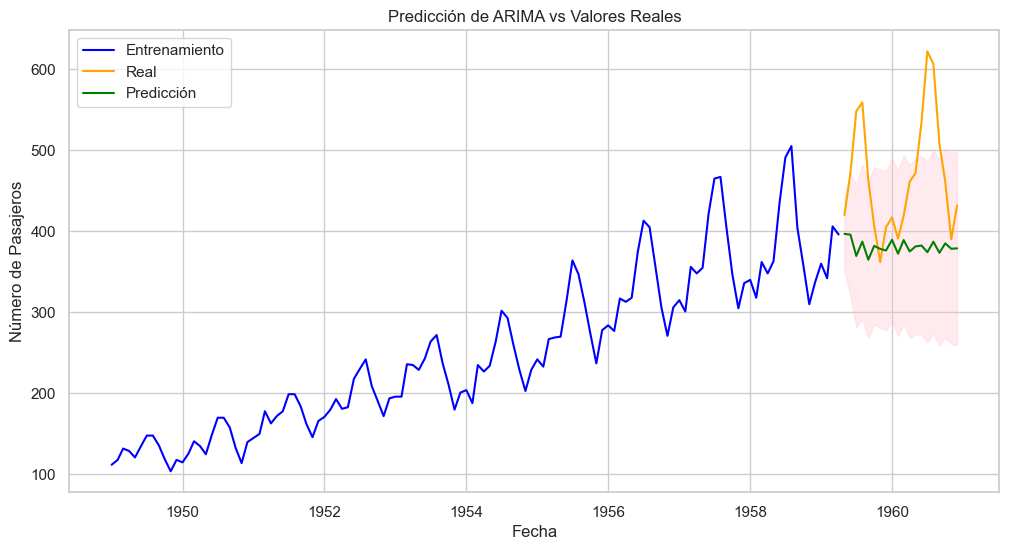

In [ ]:

from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Suponiendo que ya has dividido tus datos en train y test
# train y test ya están definidos en el ejercicio anterior

# Ajustar el modelo ARIMA usando auto_arima
model = auto_arima(train['value'], seasonal=False, stepwise=True, trace=True)

# Hacer predicciones sobre el conjunto de prueba
n_periods = len(test)
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Calcular RMSE y MAPE
rmse = np.sqrt(mean_squared_error(test['value'], forecast))
mape = mean_absolute_percentage_error(test['value'], forecast)

print(f'RMSE: {rmse}')
print(f'MAPE: {mape * 100:.2f}%')

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['value'], label='Entrenamiento', color='blue')
plt.plot(test.index, test['value'], label='Real', color='orange')
plt.plot(test.index, forecast, label='Predicción', color='green')
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('Predicción de ARIMA vs Valores Reales')
plt.xlabel('Fecha')
plt.ylabel('Número de Pasajeros')
plt.legend()
plt.show()

### Ejercicio 11

Haz lo mismo que en el ejercicio 10 pero con un modelo SARIMA. ¿Cuál es mejor y por qué?

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=843.414, Time=6.59 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=942.581, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=841.692, Time=1.19 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=890.316, Time=3.08 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1100.615, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=841.349, Time=0.12 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=841.921, Time=1.77 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=4.01 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=841.844, Time=0.20 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=842.275, Time=0.18 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=889.425, Time=0.12 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=842.600, Time=0.50 sec
 ARIMA(1,0,0)(0,1,0)[12]             : AIC=849.916, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,1,0)[12] intercept
Total fit time: 17.899 seconds
RMSE SARIMA: 30.6736858

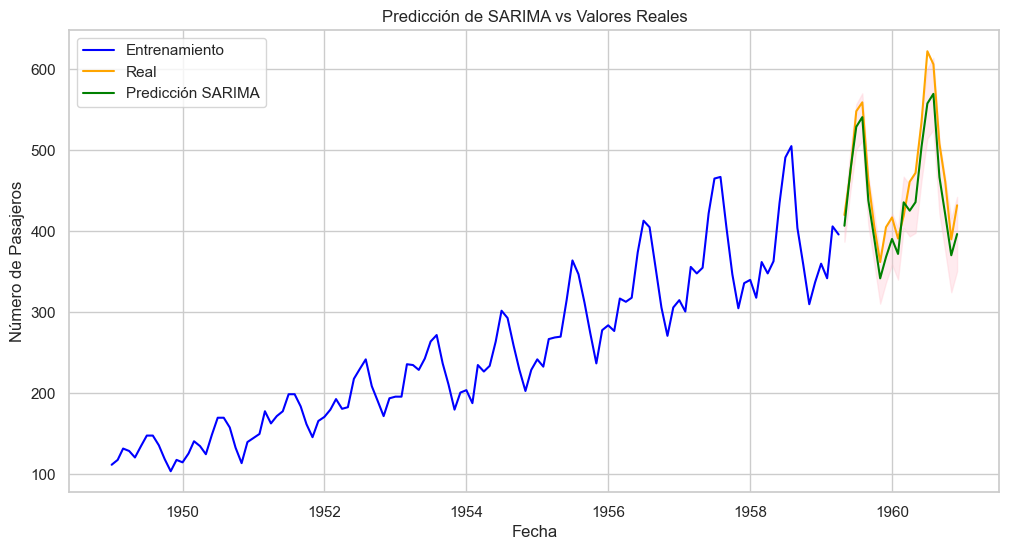

In [31]:

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Suponiendo que ya has dividido tus datos en train y test
# train y test ya están definidos en el ejercicio anterior

# Ajustar el modelo SARIMA usando auto_arima
model_sarima = auto_arima(train['value'], seasonal=True, m=12, stepwise=True, trace=True)

# Hacer predicciones sobre el conjunto de prueba
n_periods = len(test)
forecast_sarima, conf_int_sarima = model_sarima.predict(n_periods=n_periods, return_conf_int=True)

# Calcular RMSE y MAPE
rmse_sarima = np.sqrt(mean_squared_error(test['value'], forecast_sarima))
mape_sarima = mean_absolute_percentage_error(test['value'], forecast_sarima)

print(f'RMSE SARIMA: {rmse_sarima}')
print(f'MAPE SARIMA: {mape_sarima * 100:.2f}%')

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['value'], label='Entrenamiento', color='blue')
plt.plot(test.index, test['value'], label='Real', color='orange')
plt.plot(test.index, forecast_sarima, label='Predicción SARIMA', color='green')
plt.fill_between(test.index, conf_int_sarima[:, 0], conf_int_sarima[:, 1], color='pink', alpha=0.3)
plt.title('Predicción de SARIMA vs Valores Reales')
plt.xlabel('Fecha')
plt.ylabel('Número de Pasajeros')
plt.legend()
plt.show()